In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from glob import glob

In [ ]:
#resize all images to the expected size
image_size = [224, 224]

#set train, test, validation dataset path
train_path = '/content/drive/My Drive/Datasets/Pneumonia Chest Xray/train'
valid_path = '/content/drive/My Drive/Datasets/Pneumonia Chest Xray/val'
test_path = '/content/drive/My Drive/Datasets/Pneumonia Chest Xray/test'

In [ ]:
#import the VGG16 architecture and add preprocessing layer, we are using ImageNet weights
InceptionV3_model = keras.applications.InceptionV3(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
#freeze the weights of the pre-trained layers
for layer in InceptionV3_model.layers:
  layer.trainable = False

In [ ]:
#useful for getting number of output classes
folders = glob('/content/drive/My Drive/Datasets/Pneumonia Chest Xray/train/*')
folders

['/content/drive/My Drive/Datasets/Pneumonia Chest Xray/train/NORMAL',
 '/content/drive/My Drive/Datasets/Pneumonia Chest Xray/train/PNEUMONIA']

In [ ]:
InceptionV3_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
#adding our own layers
layer_flatten = keras.layers.Flatten()(InceptionV3_model.output)
output = keras.layers.Dense(len(folders), activation = "softmax")(layer_flatten)
model = keras.Model(inputs = InceptionV3_model.input, outputs = output)

In [ ]:
#compile the model and specify loss function and optimizer
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
#use the ImageDataGenerator class to load images from the dataset
train_data_generator = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_data_generator = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

test_data_generator = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [ ]:
#make sure you provide the same target size as initialied for the image size
training_set = train_data_generator.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

validation_set = valid_data_generator.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

test_set = test_data_generator.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Epoch 1/5
326/326 [==============================] - 2237s 7s/step - loss: 0.8725 - accuracy: 0.9114 - val_loss: 1.1587 - val_accuracy: 0.9375
Epoch 2/5
326/326 [==============================] - 641s 2s/step - loss: 1.0157 - accuracy: 0.9277 - val_loss: 7.7601 - val_accuracy: 0.6875
Epoch 3/5
326/326 [==============================] - 644s 2s/step - loss: 1.0674 - accuracy: 0.9325 - val_loss: 17.4327 - val_accuracy: 0.6250
Epoch 4/5
326/326 [==============================] - 643s 2s/step - loss: 0.9195 - accuracy: 0.9456 - val_loss: 2.7766 - val_accuracy: 0.8750
Epoch 5/5
326/326 [==============================] - 644s 2s/step - loss: 1.0283 - accuracy: 0.9452 - val_loss: 6.8479 - val_accuracy: 0.7500


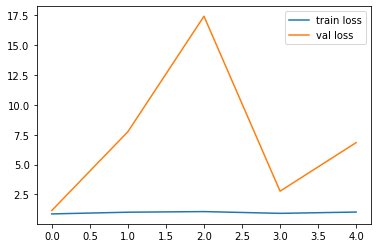

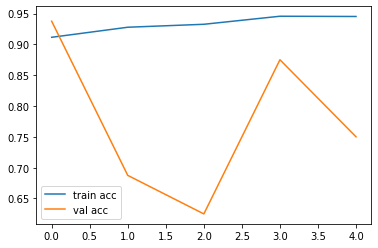

<Figure size 432x288 with 0 Axes>

In [ ]:
#train the model
history = model.fit_generator(
  training_set,
  validation_data = validation_set,
  epochs = 5,
  steps_per_epoch = len(training_set),
  validation_steps = len(validation_set)
)

#save the model as an h5 file
model.save('/content/drive/My Drive/Datasets/Pneumonia Chest Xray/model_InceptionV3.h5')

#plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
#using the model to make predictions
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,